<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Chapter-2e:-Gradient-descent" data-toc-modified-id="Chapter-2e:-Gradient-descent-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Chapter 2e: Gradient descent</a></span><ul class="toc-item"><li><span><a href="#1.-Definition" data-toc-modified-id="1.-Definition-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>1. Definition</a></span><ul class="toc-item"><li><span><a href="#1.1.-Context" data-toc-modified-id="1.1.-Context-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>1.1. Context</a></span></li><li><span><a href="#1.2.-Concept" data-toc-modified-id="1.2.-Concept-1.1.2"><span class="toc-item-num">1.1.2&nbsp;&nbsp;</span>1.2. Concept</a></span></li><li><span><a href="#1.3.-Simple-example" data-toc-modified-id="1.3.-Simple-example-1.1.3"><span class="toc-item-num">1.1.3&nbsp;&nbsp;</span>1.3. Simple example</a></span></li></ul></li><li><span><a href="#2.-Machine-learning-applications" data-toc-modified-id="2.-Machine-learning-applications-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>2. Machine learning applications</a></span><ul class="toc-item"><li><span><a href="#2.1.-Estimating-the-derivative-of-a-loss-function-(linear-regression-case)" data-toc-modified-id="2.1.-Estimating-the-derivative-of-a-loss-function-(linear-regression-case)-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>2.1. Estimating the derivative of a loss function (linear regression case)</a></span></li><li><span><a href="#2.2.-Stochastic-Gradient-Descent" data-toc-modified-id="2.2.-Stochastic-Gradient-Descent-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>2.2. Stochastic Gradient Descent</a></span></li></ul></li><li><span><a href="#3.-Wrap-up-application:-Stream-slope-analysis" data-toc-modified-id="3.-Wrap-up-application:-Stream-slope-analysis-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>3. Wrap-up application: Stream slope analysis</a></span></li><li><span><a href="#4.-References" data-toc-modified-id="4.-References-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>4. References</a></span></li></ul></li></ul></div>

# Chapter 2e: Gradient descent


## 1. Definition

### 1.1. Context

Gradient descent is an iterative optimization algorithm used in machine learning to minimize a __loss function__. The loss function describes how well the model will perform given the current set of parameters (weights and biases), and gradient descent is used to find the best set of parameters. We use gradient descent to update the parameters of our model. For example, parameters refer to coefficients in linear regression (residual sum of squares then, as we discovered in chapter 3c) and weights in neural networks (as we will discover in chapter 4+).

### 1.2. Concept

Gradient descent, also known as __steepest descent__, is an optimization algorithm for finding the local minimum of a loss function $J$. To find a local minimum, the function "steps" in the direction of the negative of the gradient. Gradient ascent is the same as gradient descent, except that it steps in the direction of the positive of the gradient and therefore finds local maximums instead of minimums. The algorithm of gradient descent can be outlined as follows:


repeat until convergence {

&emsp; $\theta_j := \theta_j - \alpha \frac{\partial}{\partial \theta_j} J(\theta)$

}

with $\theta_j$ the updated parameter and $\alpha$ the __learning rate__.

### 1.3. Simple example

As a simple example, let's find a local minimum for the function $f(x) = x^3 - 2 x^2 +2$. We can see from the plot below that the local minimum is around 1.4 or 1.5 (on the x-axis), but let us pretend that we don't know that, so we set our starting point (arbitrarily, in this case) at $x_0 = 2$.

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fmin

import warnings
warnings.filterwarnings('ignore')

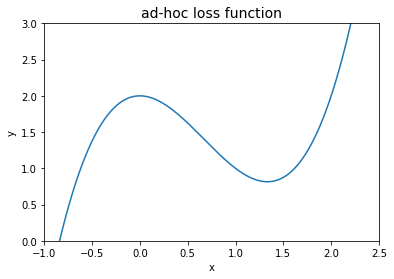

In [33]:
f = lambda x: x**3-2*x**2+2

x = np.linspace(-1,2.5,1000)
plt.plot(x,f(x))
plt.xlabel('x')
plt.ylabel('y')
plt.title('ad-hoc loss function', size = 14)
plt.xlim([-1,2.5])
plt.ylim([0,3]);

**EXERCISE 1:** Find the local minimum of the loss function. We will save all iterations for later plotting.

In [108]:
x_old = 0
x_new = 2            # initiate at x=2
alpha = 0.15           # learning rate 0.1
precision = .0001    # threshold to stop iterating

x_list, y_list = [x_new], [f(x_new)]

# returns the value of the derivative of our function
def f_prime(x):
    return 3*x**2-4*x
 
while (f_prime(x_new)>.0001):
    x_old = x_new
    x_new = x_new-alpha*f_prime(x_new)
    x_list.append(x_new)
    y_list.append(f(x_new))

print("Local minimum occurs at:", x_new)
print("Number of steps:", len(x_list))

Local minimum occurs at: 1.3333487709136433
Number of steps: 11


The figures below show the route that was taken to find the local minimum.

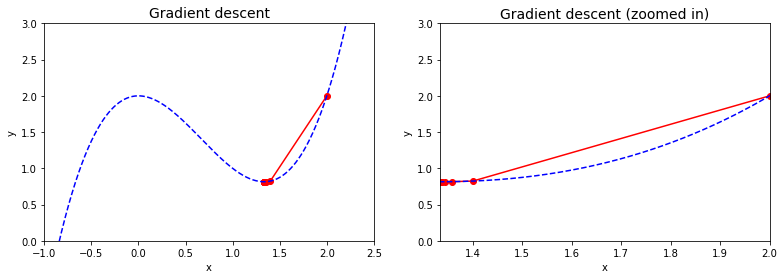

In [109]:
plt.figure(figsize=[13,4])

plt.subplot(1,2,1)
plt.scatter(x_list,y_list,c = "r")
plt.plot(x_list,y_list,c = "r")
plt.plot(x,f(x), "b--")
plt.xlim([-1,2.5])
plt.ylim([0,3])
plt.xlabel('x')
plt.ylabel('y')
plt.title('Gradient descent', size = 14)

plt.subplot(1,2,2)
plt.scatter(x_list,y_list,c = "r")
plt.plot(x_list,y_list,c = "r")
plt.plot(x,f(x), "b--")
#plt.xlim([1.2,2.1])
plt.xlim([np.min(x_list),np.max(x_list)])
plt.ylim([0,3])
plt.xlabel('x')
plt.ylabel('y')
plt.title('Gradient descent (zoomed in)', size = 14);

**EXERCISE 2:** Rerun the two previous code cells with different $x_0$ values. How many regimes do you see? Describe them in words.

Since we define that &emsp; $\theta_j := \theta_j - \alpha \frac{\partial}{\partial \theta_j} J(\theta)$,  
the method only descends from one side (that the initial value larger than the local minimum).  
If the initial value >> local minumum, the learning rate $\alpha=0.1$ is relative small. So it will take too many steps and hard to reach the local minimum.  
Only a proper initial value that close to the local minimum can lead to convergence.

**EXERCISE 3:** Rerun the two previous code cells with different $\alpha$ values. What happens when you decrease the learning rate by a factor 10? Increase $\alpha$ to 0.5?

When decreasing the learning rate, the steps will increase. If increase $\alpha$ to 0.5, the learning rate is too large, it will skip the local minimum.

You can notice that the step size (or learning rate) in the implementation above is constant. Doing this makes it easier to implement the algorithm. However, we saw some of the possible issues above.

A solution to this is to use adaptive step sizes as the algorithm below does (using `scipy`'s `fmin` function to find optimal step sizes).

**EXERCISE 4:** Copy-paste the while loop you defined in exercise 1 and include the `grad` and `alpha` lines given below. Notice the number of steps compared to the previous algorithm.

In [160]:
# we setup this function to pass into the fmin algorithm
def f2(n, x, grad):
    x = x + n * grad
    return f(x)

x_old = 0
x_new = 2
precision = 0.0001

x_list, y_list = [x_new], [f(x_new)]

while (f_prime(x_new)>precision):
    x_old = x_new
    grad = -f_prime(x_old)
    # use scipy fmin function to find ideal step size.
    alpha = fmin(f2, 0.1, (x_old, grad), full_output = False, disp = False)

    x_new = x_new-alpha*f_prime(x_old)
    x_list.append(x_new)
    y_list.append(f(x_new))


print("Local minimum occurs at ", float(x_new))
print("Number of steps:", len(x_list))

Local minimum occurs at  1.3333333251953126
Number of steps: 3


With adaptive step sizes, the algorithm converges in just 4 iterations rather than 17. Of course, it takes time to compute the appropriate step size at each iteration. Here are some plots of the path taken below. You can see that it converges very quickly to a point near the local minimum, so it's hard to even discern the dots after the first two steps until we zoom in very close in the third frame below:

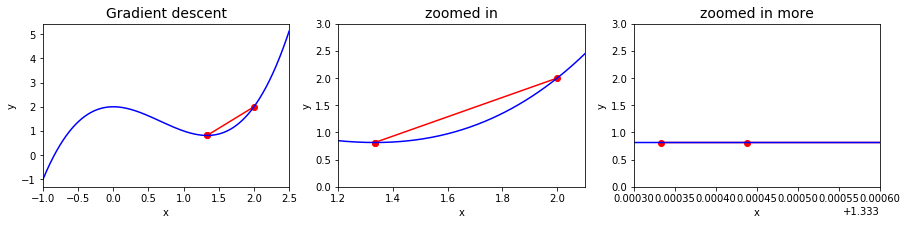

In [118]:
plt.figure(figsize=[15,3])

plt.subplot(1,3,1)
plt.scatter(x_list,y_list,c="r")
plt.plot(x_list,y_list,c="r")
plt.plot(x,f(x), c="b")
plt.xlim([-1,2.5])
plt.xlabel('x')
plt.ylabel('y')
plt.title('Gradient descent', size = 14)

plt.subplot(1,3,2)
plt.scatter(x_list,y_list,c="r")
plt.plot(x_list,y_list,c="r")
plt.plot(x,f(x), c="b")
plt.xlim([1.2,2.1])
plt.ylim([0,3])
plt.xlabel('x')
plt.ylabel('y')
plt.title('zoomed in', size = 14)

plt.subplot(1,3,3)
plt.scatter(x_list,y_list,c="r")
plt.plot(x_list,y_list,c="r")
plt.plot(x,f(x), c="b")
plt.xlim([1.3333,1.3336])
plt.ylim([0,3])
plt.title('zoomed in more', size = 14)
plt.xlabel('x')
plt.ylabel('y');

Another approach to update the step size is choosing a decrease constant $d$ that shrinks the step size over time: $\alpha_{t+1} = \alpha_t / (1 + t \times d)$.

**EXERCISE 5:** Copy-paste the while loop you defined in exercise 1 and include the updating equation for $\alpha$.

In [164]:
x_old = 0
x_new = 2
alpha = 0.1
precision = .0001
t, d = 0, 1

x_list, y_list = [x_new], [f(x_new)]

while (f_prime(x_new)>.0001):
    x_old = x_new
    alpha = alpha/(1+t*d)
    x_new = x_new-alpha*f_prime(x_old)
    x_list.append(x_new)
    y_list.append(f(x_new))

print("Local minimum occurs at:", x_new)
print("Number of steps:", len(x_list))

Local minimum occurs at: 1.3333532073236807
Number of steps: 20


## 2. Machine learning applications

Let us now formalize gradient descent and apply it in machine learning examples.

### 2.1. Estimating the derivative of a loss function (linear regression case)

Our goal is to find the equation of the straight line $h_\theta(x) = \theta_0 + \theta_1 x$ that best fits our data points. The loss function that we are trying to minimize in this case is the residual sum of squares:
$$
J(\theta_0, \theta_1) = \frac{1}{2m} \sum_{i=1}^m \left(h_\theta(x_i) -y_i \right)^2
$$
In this case, our gradient will be defined in two dimensions:
$$
\frac{\partial}{\partial \theta_0} J(\theta_0, \theta_1) = \frac{1}{m} \sum_{i=1}^m \left(h_\theta(x_i) -y_i \right)
$$
$$
\frac{\partial}{\partial \theta_1} J(\theta_0, \theta_1) = \frac{1}{m} \sum_{i=1}^m \left((h_\theta(x_i) -y_i) \cdot x_i \right)
$$

**EXERCISE 6:** Write the loss function $J$ and gradient function `grad_J` in Python.

In [9]:
h = lambda theta_0,theta_1, x: theta_0 + theta_1*x     # one elegant way to write a function without def

def J(x,y,m,theta_0,theta_1):
    returnValue = 0
    for i in range(m):
        returnValue += (h(theta_0,theta_1,x[i])-y[i])**2
    returnValue = returnValue/(2*m)
    return returnValue

def grad_J(x,y,m,theta_0,theta_1):
    returnValue = np.array([0.,0.])
    for i in range(m):
        returnValue[0] +=  h(theta_0,theta_1,x[i])-y[i]
        returnValue[1] += (h(theta_0,theta_1,x[i])-y[i])*x[i]
    returnValue = returnValue/(2*m)
    return returnValue


**EXERCISE 7:** Simulate 50 data points that follow the equation $y = 2x-5$ with some noise. To do so, simply copy paste the second code cell from `chap2c.ipynb`.

In [135]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.pipeline import make_pipeline

Model slope:     2.0103120137207804
Model intercept: -5.039251752776108


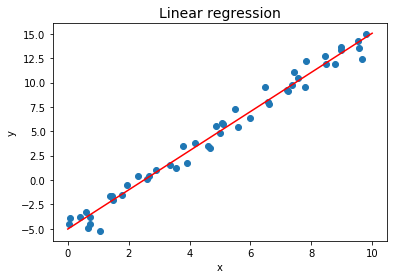

In [175]:
w = 2
b = -5

rng = np.random.RandomState()
x = 10 * rng.rand(50)
y = w * x + b + rng.randn(50)

# linear regression
model = LinearRegression(fit_intercept = True)
model.fit(x[:, np.newaxis], y) #np.newaxis: add one dimension 

xfit = np.linspace(0, 10, 1000)
yfit = model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit, 'r')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear regression', size = 14);

print("Model slope:    ", model.coef_[0])
print("Model intercept:", model.intercept_)

In chapter 2c, we used the function `LinearRegression` from `sklearn.linear_model` to estimate the model parameters. We also computed them manually since there is an analytical solution for the linear regression. We will now use the gradient descent numerical method, which applies broadly to many classes of Machine Learning techniques!

**EXERCISE 8:** Estimate the parameters of the linear regression model by using gradient descent.

In [187]:
theta_old = np.array([0.,0.])
theta_new = np.array([1.,1.])
alpha = 0.001
precision = 0.001
num_steps = 0
grad = float("inf")

# YOUR CODE HERE
while np.linalg.norm(grad) > precision:   # takes the norm of the matrix to check tendency to zero
    num_steps += 1
    theta_old = theta_new
    grad = grad_J(x,y,50,theta_old[0],theta_old[1])
    theta_new = theta_new - alpha*grad
    if (num_steps%10000==0):
        print(num_steps)

print("Local minimum occurs where:")
print("theta_0 =", theta_new[0])
print("theta_1 =", theta_new[1])
print("This took",num_steps,"steps to converge")

10000
20000
30000
40000
Local minimum occurs where:
theta_0 = -5.03203115275502
theta_1 = 2.009230218835602
This took 49157 steps to converge


We see that our values are relatively close to the actual values. This numerical approach will come back for example when we will explore the back-propagation algorithm for updating weights in (deep) neural networks.


**EXERCISE 9:** Plot the result.

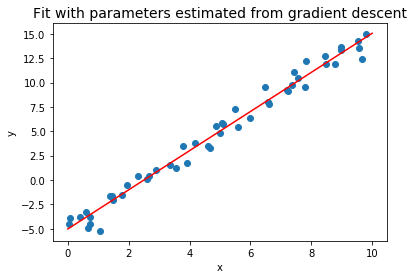

In [189]:
# YOUR CODE HERE
xfit = np.linspace(0, 10, 1000)
yfit = h(theta_new[0],theta_new[1],xfit)

plt.scatter(x, y)
plt.plot(xfit, yfit, 'r')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Fit with parameters estimated from gradient descent', size = 14);

### 2.2. Stochastic Gradient Descent

There is a disadvantage of applying the typical gradient descent optimization technique described previously, called __Batch gradient descent (BGD)__, as it calculates the error for each example in the training dataset, but only updates the model after all training examples have been evaluated. This becomes computationally very expensive when $m$ is high (e.g. in the millions).

This problem can be solved by Stochastic Gradient Descent (SGD). The word ‘stochastic’ means a system or a process that is linked with a random probability. Stochastic gradient descent uses this idea to speed up the process of performing gradient descent. Hence, unlike the typical gradient descent optimization, instead of using the whole data set for each iteration, we are able to use the cost gradient of only 1 example at each iteration.

The update of the parameters is now done as follows, for each data sample:
$$
\begin{bmatrix}
    \theta_0 \\
    \theta_1 \\
\end{bmatrix} := 
\begin{bmatrix}
    \theta_0 \\
    \theta_1 \\
\end{bmatrix} - \alpha
\begin{bmatrix}
    2 (h_\theta(x_i) - y_i) \\
    2 x_i (h_\theta(x_i) - y_i) \\
\end{bmatrix}
$$

Note that __Mini-Batch gradient descent__ splits the training dataset into small batches that are used to calculate model error and updated model coefficients. This is the most common implementation of gradient descent used in the field of machine learning as we will see in the next chapters! Indeed, it offers a compromise in the trade-off between  accuracy of the gradient versus the time complexity to perform each parameter’s update (learning step).

Below, let us apply SGD to another linear regression composed of 500,000 samples!

In [191]:
f = lambda x: x*2 + 17 + np.random.randn(len(x)) * 10

x = np.random.random(500000) * 100
y = f(x) 
m = len(y)

In [192]:
h = lambda theta_0,theta_1,x: theta_0 + theta_1*x
cost = lambda theta_0,theta_1, x_i, y_i: 0.5*(h(theta_0,theta_1,x_i)-y_i)**2

In [193]:
theta_old = np.array([0.,0.])
theta_new = np.array([1.,1.])
alpha = .000005

iter_num = 0
grad = np.array([float("inf"), float("inf")])
sum_cost = 0
cost_list = []

for j in range(10):
    for i in range(m):
        iter_num += 1
        theta_old = theta_new
        grad[0] = (h(theta_old[0],theta_old[1],x[i])-y[i])
        grad[1] = (h(theta_old[0],theta_old[1],x[i])-y[i])*x[i]
        theta_new = theta_old - alpha * grad
        sum_cost += cost(theta_old[0], theta_old[1], x[i], y[i])
        if (i+1) % 10000 == 0:
            cost_list.append(sum_cost/10000.0)
            sum_cost = 0   
            
print("Local minimum occurs where:")
print("theta_0 =", theta_new[0])
print("theta_1 =", theta_new[1])

Local minimum occurs where:
theta_0 = 16.93353464024129
theta_1 = 2.002224221523404


Let us describe what we did: Every 10,000 steps, we get an average cost from the last 10,000 steps and then append that to a `cost_list` variable. We then run through the entire list 10 times (i.e. 10 epochs). As one can see from the cost-versus-number of iterations plot, the cost goes down quickly at first, but starts to level off as we go through more iterations:

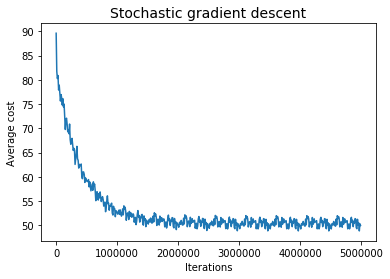

In [194]:
iterations = np.arange(len(cost_list))*10000
plt.plot(iterations,cost_list)
plt.xlabel('Iterations')
plt.ylabel('Average cost')
plt.title('Stochastic gradient descent', size = 14);

## 3. Wrap-up application: Stream slope analysis

To finish chapter 2, and before moving to chapter 3 on Support Vector Machines and decision trees, let us apply everything we learned in the previous lectures.

We will consider stream slopes in Italian catchments and study the proportionality between average slope of upvalley streams and average slope of downvalley streams. This example comes from Grauso et al. (2018). The data, provided in file `geomorpho_ValleySlope.csv`, is shown in Figure 3 in the article.

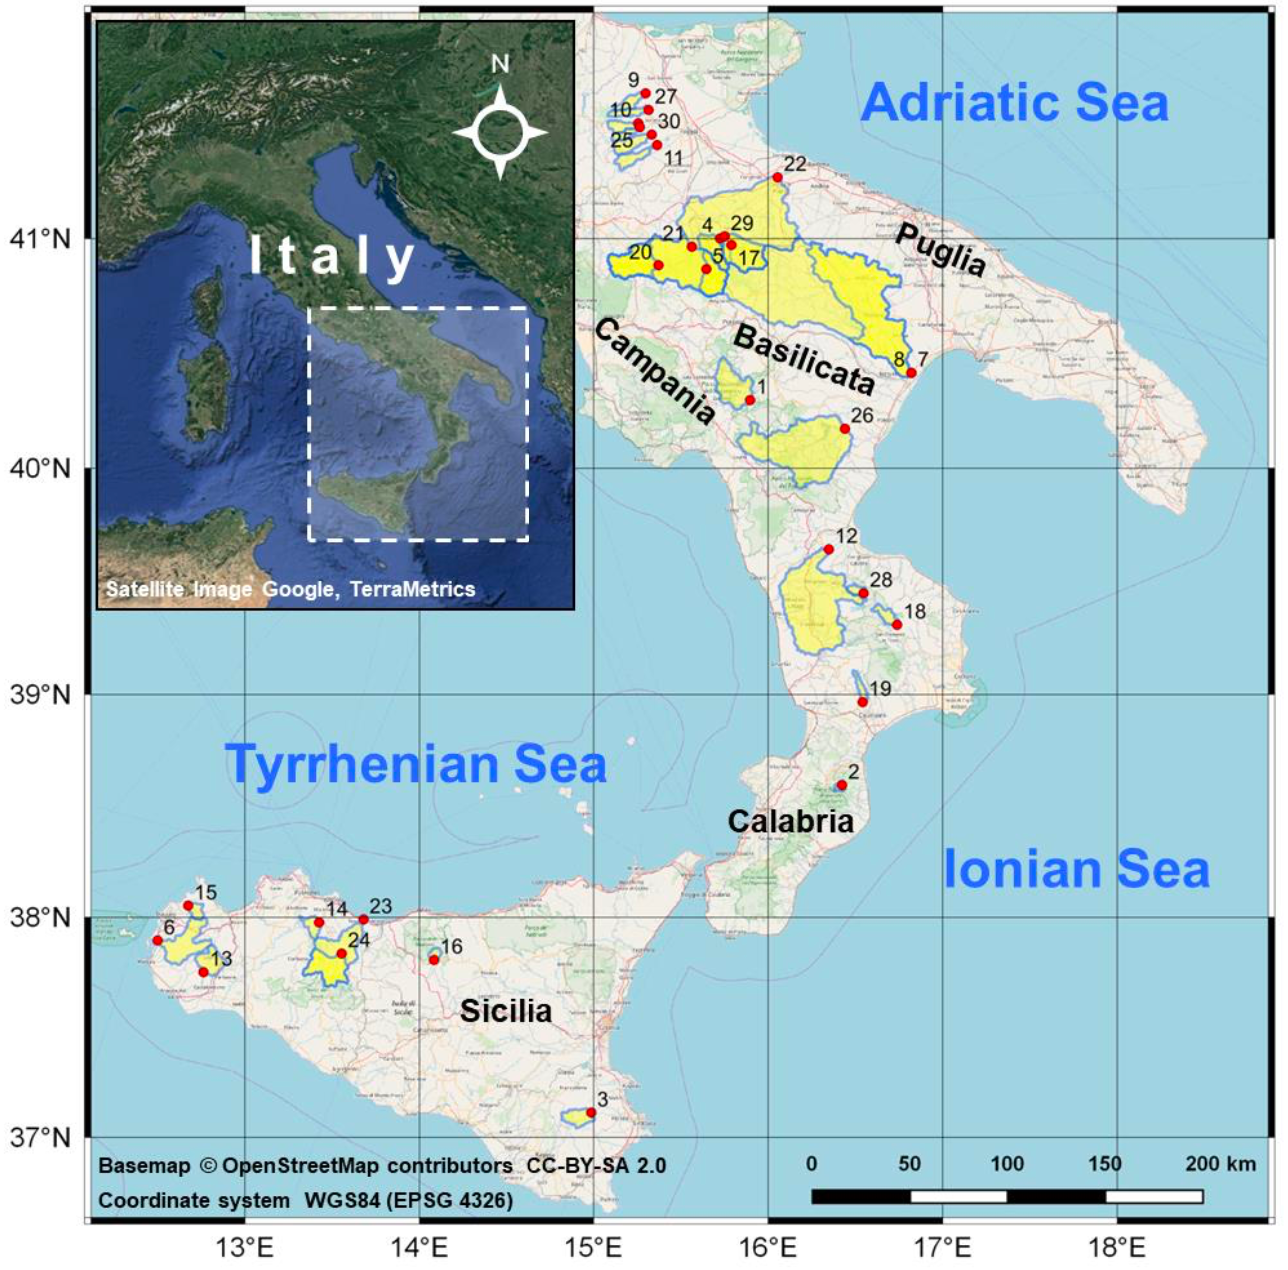

**EXERCISE 10:** Read the data, fit the data with `LinearRegression`, and plot the result (use `SlopeUp` as $x$ and `SlopeDown` as $y$).

**EXERCISE 11:** Retrieve the same model parameters by manually implementing BGD. Consider tuning the hyperparameters to get the closest to the results of exercise 10. Compare the results on a graph.

**EXERCISE 12:** Fit the data with a polynomial regression of 5th order (remember `PolynomialFeatures`), and plot the result. Use a regularization technique to retrieve a model close to the original linear regression model. Again, consider tuning the hyperparameters. Compare the results on a graph.

In [4]:
import pandas as pd
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [2]:
ds = pd.read_csv('data/geomorpho_ValleySlope.csv')
ds.head()

,SlopeUp,SlopeDown
0,0.080922,0.032699
1,0.090915,0.020169
2,0.102148,0.028004
3,0.103896,0.020826
4,0.107448,0.025033


Model slope:     0.3391726948640881
Model intercept: 0.0017541947923073245


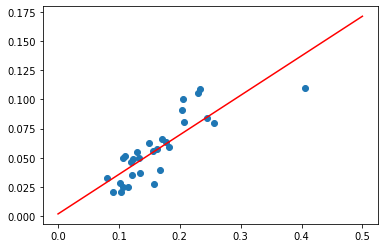

In [7]:
x = ds.SlopeUp
y = ds.SlopeDown

# linear regression
model = LinearRegression(fit_intercept = True)
model.fit(x[:, np.newaxis], y) #np.newaxis: add one dimension 

xfit = np.linspace(0, 0.5, 1000)
yfit = model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit, 'r')

print("Model slope:    ", model.coef_[0])
print("Model intercept:", model.intercept_)

In [16]:
theta_old = np.array([0.,0.])
theta_new = np.array([.01,1])
alpha = 0.0005
precision = 0.005
num_steps = 0
grad = float("inf")

while np.linalg.norm(grad) > precision:   # takes the norm of the matrix to check tendency to zero
    num_steps += 1
    theta_old = theta_new
    grad = grad_J(x,y,30,theta_old[0],theta_old[1])
    theta_new = theta_new - alpha*grad
    if (num_steps%10000==0):
        print(num_steps)

print("Local minimum occurs where:")
print("theta_0 =", theta_new[0])
print("theta_1 =", theta_new[1])
print("This took",num_steps,"steps to converge")

Local minimum occurs where:
theta_0 = -0.09305402312304974
theta_1 = 0.9764561874390896
This took 9760 steps to converge


Local minimum occurs where:
theta_0 = 0.0013668060697212378
theta_1 = 0.3415394018833827
This took 1344434 steps to converge


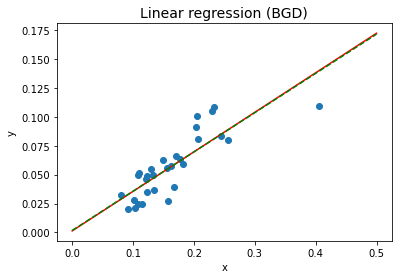

In [19]:
plt.scatter(x, y)
plt.plot(xfit_bgd, yfit_bgd, 'r')
plt.plot(xfit, yfit, '--',color='green',)

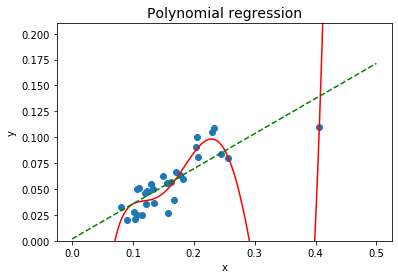

In [221]:
poly_model = make_pipeline(PolynomialFeatures(5),
                           LinearRegression())

poly_model.fit(x[:, np.newaxis], y)
xfit_poly = np.linspace(0, 0.5, 1000)
yfit_poly = poly_model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit_poly, yfit_poly, 'r')
plt.plot(xfit, yfit, '--',color='green',)

plt.ylim(0,0.21)
plt.yticks(np.arange(0,0.21,0.025))
plt.xlabel('x')
plt.ylabel('y')
plt.title('Polynomial regression', size = 14);

array([ 0.        ,  0.31581376, -0.        , -0.        , -0.        ,
       -0.        ])

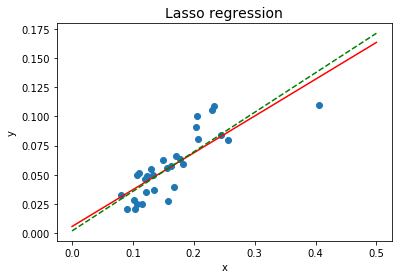

In [228]:
ridge_model = make_pipeline(PolynomialFeatures(5), Lasso(alpha = .0001))
ridge_model.fit(x[:, np.newaxis], y)
yfit_poly_reg = ridge_model.predict(xfit_poly[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit_poly, yfit_poly_reg, 'r')
plt.plot(xfit, yfit, '--',color='green',)

plt.xlabel('x')
plt.ylabel('y')
plt.title('Lasso regression', size = 14);

ridge_model.steps[1][1].coef_

Congratulations! You just finished chapter 2.

## 4. References

* Grauso et al. (2018), Investigating the Sediment Yield Predictability in Some Italian Rivers by Means of Hydro-Geomorphometric Variables, Geosciences, 8, 249